In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [154]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    #çompute trip duration in minutes
    df["duration_in_mins"] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration_in_mins = df.duration_in_mins.apply(lambda td: td.total_seconds()/60)

    #Select all trips less than 60
    df = df[(df.duration_in_mins>=1) & (df.duration_in_mins <=60)]

    #Extract the most useful categorical and numerical variables from our dataset
    categorical = ['PULocationID','DOLocationID']

    #Convert numerical variables to categorical variables
    df[categorical] = df[categorical].astype(str)
    
    return df

In [155]:
df_train = read_dataframe("./data/green_tripdata_2022-01.parquet")
df_val = read_dataframe("./data/green_tripdata_2022-02.parquet")
df_train.shape, df_validation.shape

((59603, 21), (66097, 21))

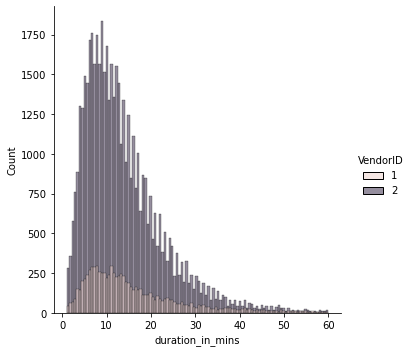

In [156]:
#Visualize trips less than 60
ldf = df_train
ldf = ldf[(ldf.duration_in_mins>=1) & (ldf.duration_in_mins <=60)]
sns.displot(data =  ldf, x = "duration_in_mins", hue="VendorID")

In [157]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
import pickle

In [158]:
#combine the pickup and drop off location ids 
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']


In [159]:
#Extract the most useful categorical and numerical variables from our dataset
# categorical = ['PULocationID','DOLocationID']
categorical = ['PU_DO']
numerical = ['trip_distance']

#perform data vectorization
dv = DictVectorizer()

#Convert our selected features to dictionaries for our vectorizers to work
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

#Convert our selected features to dictionaries for our vectorizers to work
val_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [180]:
target = 'duration_in_mins'
y_train = df_train[target].values
y_val = df_val[target].values

In [194]:
#Use Linear Regreassion as our baseline

#train our model
lr = LinearRegression()
lr.fit(X_train, y_train)

#model prediction
y_pred = lr.predict(X_train)

#evaluate our model
mean_squared_error(y_train, y_pred, squared=False)

4.9985053565382715

In [195]:
#save model for deployment

with open('models/lin_reg.bin', 'wb') as m_out:
    pickle.dump((dv,lr), m_out)

In [190]:
#Ridge regression

#train our model
lr = Ridge(alpha=0.0005)
lr.fit(X_train, y_train)

#model prediction
y_pred = lr.predict(X_train)

#evaluate our model
mean_squared_error(y_train, y_pred, squared=False)

9.43591924993184

In [192]:
#Lasso regression

#train our model
lr = Lasso(alpha=0.05)
lr.fit(X_train, y_train)

#model prediction
y_pred = lr.predict(X_train)

#evaluate our model
mean_squared_error(y_train, y_pred, squared=False)

9.133775641798206

In [164]:
# dv.feature_names_

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


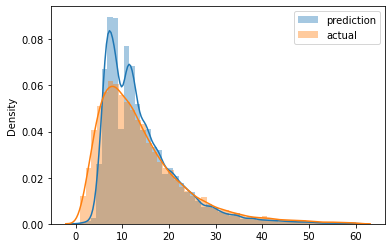

In [165]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()